## SMOTE(Synthetic Minority Oversampling Technique)

SMOTE, or Synthetic Minority Oversampling Technique, is a popular method used to address class imbalance in datasets, particularly in binary classification problems where one class has significantly fewer instances than the other (often known as the minority class). The goal of SMOTE is to increase the number of instances in the minority class by synthetically generating new, similar data points, rather than simply duplicating existing ones.

How SMOTE Works
Identify Nearest Neighbors: For each data point in the minority class, SMOTE finds its k-nearest neighbors. These neighbors are other data points in the same minority class.

Generate Synthetic Samples: Random points are generated along the line segments that connect the target data point with its nearest neighbors. By interpolating new points between existing samples, SMOTE creates synthetic instances of the minority class that are close to real ones but not identical.

Add to Dataset: The synthetic samples are then added to the dataset to balance out the classes, which can help machine learning models learn more robust decision boundaries for both classes.

In [4]:
from sklearn.datasets import make_classification


In [5]:
X , Y = make_classification(n_samples=1000 ,n_redundant=0, n_features=2 , n_clusters_per_class=1,
                    weights=[0.90] , random_state=12)

In [6]:
import pandas as pd   
df1 = pd.DataFrame(X,columns=['f1' , 'f2'])
df2 = pd.DataFrame(Y , columns=  ['target'])

final_df = pd.concat([df1 , df2] , axis = 1)

final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

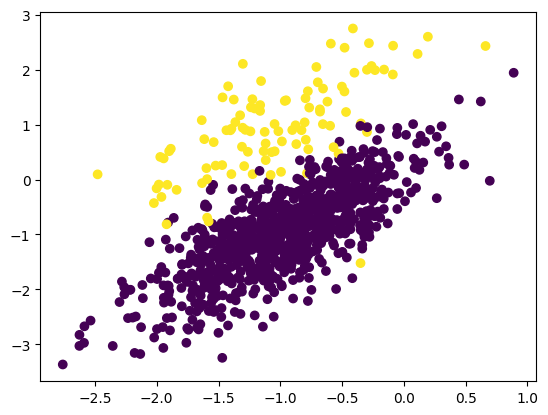

In [8]:
import matplotlib.pyplot as plt    # type: ignore
plt.scatter(final_df['f1'] , final_df['f2'] , c = final_df['target'])

In [9]:
import imblearn # type: ignore
print(imblearn.__version__)


0.12.4


In [10]:
from imblearn.over_sampling import  SMOTE  # type: ignore

In [11]:
oversample = SMOTE()
X, Y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])


In [12]:
X.shape


(1800, 2)

In [13]:
Y.shape

(1800,)

In [14]:
len(Y[Y==0])

900

In [15]:
len(Y[Y==1])

900

In [16]:
df1 = pd.DataFrame(X , columns=['f1' , 'f2'])
df2 = pd.DataFrame(Y , columns=['target'])
oversample_df = pd.concat([df1 , df2] , axis= 1)

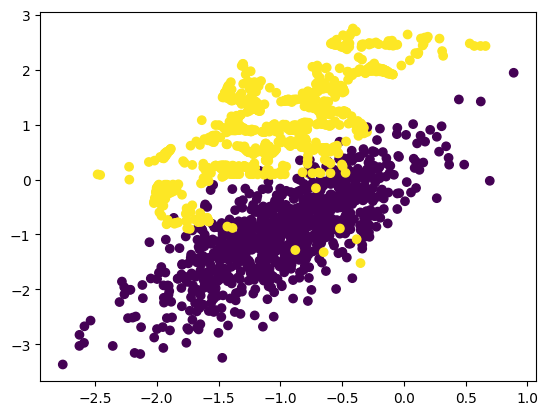

In [17]:
import matplotlib.pyplot as plt    # type: ignore
plt.scatter(oversample_df['f1'] , oversample_df['f2'] , c = oversample_df['target'])